In [1]:
def test_data(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

In [2]:
def create_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_data(X.ravel(), error)
    return X, y

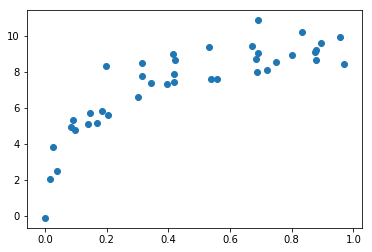

In [4]:
import numpy as np
import matplotlib.pyplot as plt
X, y = create_data(40, error=1)
plt.scatter(X.ravel(), y);

In [5]:
#Now we perform a regression on this data.
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X, y)
y_test = model.predict(X_test)


In [6]:
#We have fit a straight line to the data, but clearly this model is not a good choice. 
#We say that this model is biased, or that it under-fits the data.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

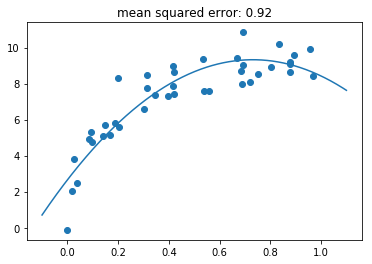

In [9]:
model = PolynomialRegression(2)
model.fit(X, y)
y_test = model.predict(X_test)
plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)));

In [10]:
#This reduces the mean squared error, and makes a much better fit.
#What happens if we use an even higher-degree polynomial?

(-4, 14)

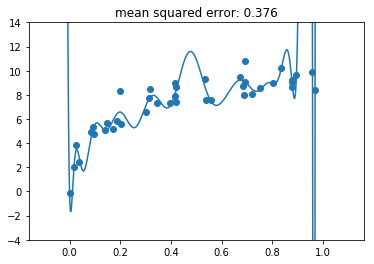

In [16]:
model = PolynomialRegression(30)
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
plt.ylim(-4, 14)

In [14]:
#It's clear that the resulting fit is no longer reflecting the true underlying distribution, but is more sensitive to the noise in the training data.For this reason, 
#We call it a high-variance model, and we say that it over-fits the data.